In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')


In [2]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df['Category']=encoder.fit_transform(df['Category']) #to convert spam and ham to numerical values 0=ham and 1=spam


In [11]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [17]:
df.duplicated().sum() #check for duplicate values


415

In [18]:
df=df.drop_duplicates(keep='first')


In [19]:
df.duplicated().sum()


0

In [20]:
df.shape


(5157, 2)

In [22]:
#check distribution of sapm and ham/real msg 0-->ham  1-->spam
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

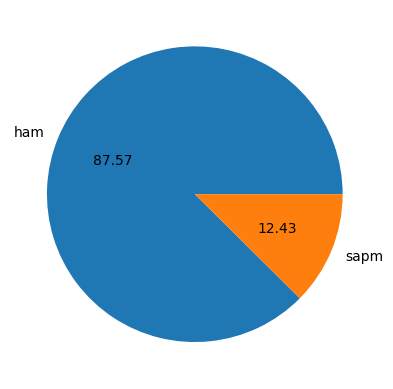

In [23]:
#represent it graphically
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['ham','sapm'],autopct="%0.2f")
plt.show()

In [24]:
#Data is imbalanced ham is huge
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
#length in terms of characters used in that sentence
df['num_characters']=df['Message'].apply(len)
df.sample(5)


,Category,Message,num_characters
1904,1,Free entry in 2 a weekly comp for a chance to ...,143
896,0,"Superb Thought- ""Be grateful that u dont have ...",148
3820,0,"sorry brah, just finished the last of my exams...",55
1205,1,WIN a year supply of CDs 4 a store of ur choic...,147
2890,0,My battery is low babe,22


In [28]:
#fetch the number of words length
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.sample(6)


,Category,Message,num_characters,num_words
4643,1,You are being ripped off! Get your mobile cont...,143,20
609,0,Neva mind it's ok..,19,6
1400,0,You have registered Sinco as Payee. Log in at ...,155,37
4447,0,Merry christmas to u too annie!,31,7
4390,0,"K I'm ready, &lt;#&gt; ?",25,13
1457,0,U sleeping now.. Or you going to take? Haha.. ...,104,25


In [30]:
#fetch the number of sentences length
df['num_sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()


,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
#description of msg on the basis of ham
df[df['Category']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.951506,17.250664,1.827724
std,56.732233,13.581714,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#description of msg on the basis of spam
df[df['Category']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.541342,27.663027,2.970359
std,30.516111,7.104050,1.485575
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

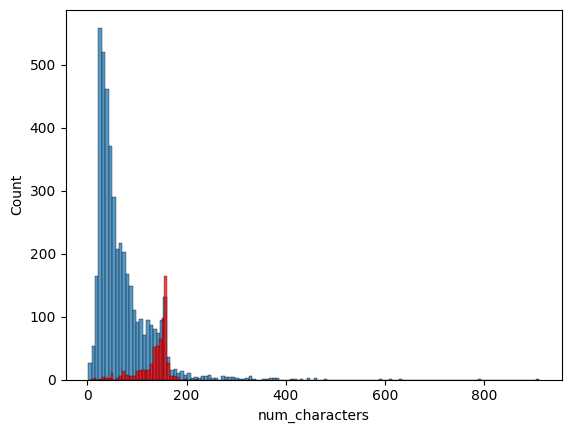

In [35]:
#to graphically understand the difference in msg
import seaborn as sns
sns.histplot(df[df['Category']==0]['num_characters'])
sns.histplot(df[df['Category']==1]['num_characters'],color='red')

# as we can observe that most of ham/real message are of 0 to 150 characters whereas
#spam most msg range from 160-190 characters approx

In [37]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Ensure that necessary NLTK packages are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    text = nltk.word_tokenize(text)
    
    y = []
    
    # Remove non-alphanumeric characters
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    text = y[:]
    y.clear()
    
    # Apply stemming
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

# Example usage
print(transform_text('HI GOOD BAD SAD Lopez %^*&&* IS ARE.Are you a funny person'))


hi good bad sad lopez funni person


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
df['transformed_text']=df['Message'].apply(transform_text)


In [42]:
df.sample(5)


,Category,Message,num_characters,num_words,num_sentences,transformed_text
119,0,Hmm...my uncle just informed me that he's payi...,86,20,2,hmm uncl inform pay school directli pl buy food
548,0,"Sorry that took so long, omw now",32,8,1,sorri took long omw
1844,0,Super da:)good replacement for murali,37,8,1,super da good replac murali
384,0,Hey i will be late ah... Meet you at 945+,41,11,1,hey late ah meet
2393,0,"Thanks da thangam, i feel very very happy dear...",67,17,2,thank da thangam feel happi dear also miss da


In [43]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [45]:
#word cloud of msg
# visual representations of text data where the size of each word corresponds to its frequency or importance within the text.
#to understand which words are mostly used in spam and real message

from wordcloud import WordCloud
wc=WordCloud(width=600,min_font_size=15,height=600,background_color='black')

In [48]:
spam_wc=wc.generate(df[df['Category']==1]['transformed_text'].str.cat(sep=" "))
ham_wc=wc.generate(df[df['Category']==0]['transformed_text'].str.cat(sep=" "))


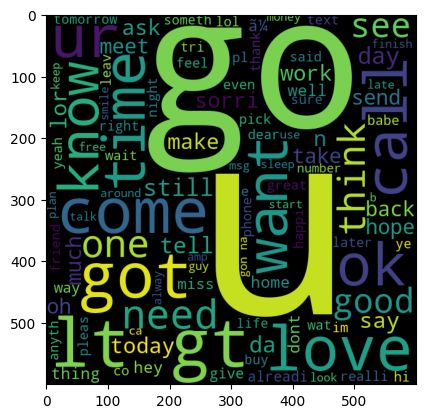

In [50]:
plt.imshow(ham_wc)


In [51]:
spam_wc=wc.generate(df[df['Category']==1]['transformed_text'].str.cat(sep=" "))


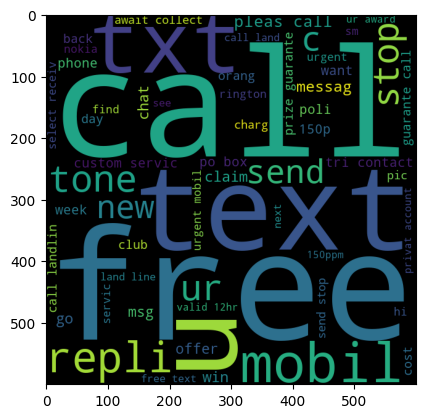

In [52]:
plt.imshow(spam_wc)


In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

#since cv didnot gave a higher precision we use tfidf to check if there is a higher precision
X=tfidf.fit_transform(df['transformed_text']).toarray()
Y=df['Category'].values

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)


In [57]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [59]:
#gaussian Nb
gnb.fit(X_train,Y_train)
Y_pred=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))

0.8682170542635659
[[787 118]
 [ 18 109]]
0.4801762114537445


In [60]:
mnb.fit(X_train,Y_train)
Y_pred1=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

#highest precision is obtained in mnb when tfidf is used.....in email spam we care more about precision(i.e. spam lai ham ra ham lai spam nabhanne)

0.9728682170542635
[[905   0]
 [ 28  99]]
1.0


In [62]:
#bernoulli navie bayes
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
}

In [64]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test,Y_pred)
    
    return accuracy,precision

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9777131782945736
Precision -  0.9905660377358491
For  KN
Accuracy -  0.9127906976744186
Precision -  1.0
For  NB
Accuracy -  0.9728682170542635
Precision -  1.0
For  DT
Accuracy -  0.936046511627907
Precision -  0.8210526315789474
For  LR
Accuracy -  0.9583333333333334
Precision -  0.9375
For  RF
Accuracy -  0.9709302325581395
Precision -  1.0


C:\Users\ASUS\.conda\envs\myenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9670542635658915
Precision -  0.9514563106796117


In [65]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))